Big Data Analytics Project: Online Marketing

This project is about data from the area of ​​online marketing. Advertising banners are placed on websites to attract visitors to product pages. This advertising costs money and it is therefore important for companies that want to market in this way to be able to assess the success of these advertising measures. A number of metrics can be used to make such an assessment. The “Click-Through Rate” (CTR) simply measures how often an advertisement was clicked on relative to the total number of “ad impressions”. The “conversion rate” goes one step further and then includes how often a click led to an actual purchase.
The data set to be processed, which you can find in the data exchange folder ("advertising.csv"), contains various user data and, as a crucial label, the "Click on Ad" column, which tells us whether a visitor clicked on an advertisement (1) or not (0).

The data set contains the following properties:

    'Daily Time Spent on Site': Time on the website in minutes
    'Age': Age in years
    'Area Income': Average income of the user's region
    'Daily Internet Usage': Average number of minutes the user spends on the Internet every day
    'Ad Topic Line': headline of the advertisement
    'City': City of the user
    'Male': Whether the user is male (1) or not (0)
    'Country': User's country
    'Timestamp': Time when the user clicked on the advertisement or closed the window
    'Clicked on Ad': Whether the user clicked (1) or not (0)

### Task

You should perform a classification (__logistic regression__) based on the existing data on user characteristics so that you can predict for future users whether the user in question will click or not. Based on this, you could then make changes to the advertising campaign and tailor it to the visitors.<br>
You first carry out an exploration of the data and get an overview of whether the necessary data quality is present. At this point, appropriate changes (dummy coding or similar) would have to be made. You visualize the data to be able to assess relationships between the characteristics. Then prepare your data for training the classification model (training and test data, no CV!). You don't have to standardize. The model is trained and applied to the test data. Validate the model with a classification report and formulate the findings you gained during the investigation. If necessary, make suggestions about what the company can improve for the future.<br>

### Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logit
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

### Loading of Data

In [2]:
visitors = pd.read_csv('Advertising.csv')

Here we look at the data

In [3]:
visitors.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

We get an overview of the missing values.

In [4]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


We get an overview of data types, scale levels and typical values ​​of characteristic expressions with descriptive statistics.

In [5]:
visitors.describe(include='all')

Daily Time Spent on Site          Age   Area Income  \
count                1000.000000  1000.000000   1000.000000   
unique                       NaN          NaN           NaN   
top                          NaN          NaN           NaN   
freq                         NaN          NaN           NaN   
mean                   65.000200    36.009000  55000.000080   
std                    15.853615     8.785562  13414.634022   
min                    32.600000    19.000000  13996.500000   
25%                    51.360000    29.000000  47031.802500   
50%                    68.215000    35.000000  57012.300000   
75%                    78.547500    42.000000  65470.635000   
max                    91.430000    61.000000  79484.800000   

        Daily Internet Usage                Ad Topic Line       City  \
count            1000.000000                         1000       1000   
unique                   NaN                         1000        969   
top                      NaN  Polarized analyzing concept  Lisamouth   
freq                     NaN                            1          3   
mean              180.000100                          NaN        NaN   
std                43.902339                          NaN        NaN   
min               104.780000                          NaN        NaN   
25%               138.830000                          NaN        NaN   
50%               183.130000                          NaN        NaN   
75%               218.792500                          NaN        NaN   
max               269.960000                          NaN        NaN   

               Male Country            Timestamp  Clicked on Ad  
count   1000.000000    1000                 1000     1000.00000  
unique          NaN     237                 1000            NaN  
top             NaN  France  2016-03-08 10:39:16            NaN  
freq            NaN       9                    1            NaN  
mean       0.481000     NaN                  NaN        0.50000  
std        0.499889     NaN                  NaN        0.50025  
min        0.000000     NaN                  NaN        0.00000  
25%        0.000000     NaN                  NaN        0.00000  
50%        0.000000     NaN                  NaN        0.50000  
75%        1.000000     NaN                  NaN        1.00000  
max        1.000000     NaN                  NaN        1.00000

### Exploratory data analysis


Here I create histogram to examine the data

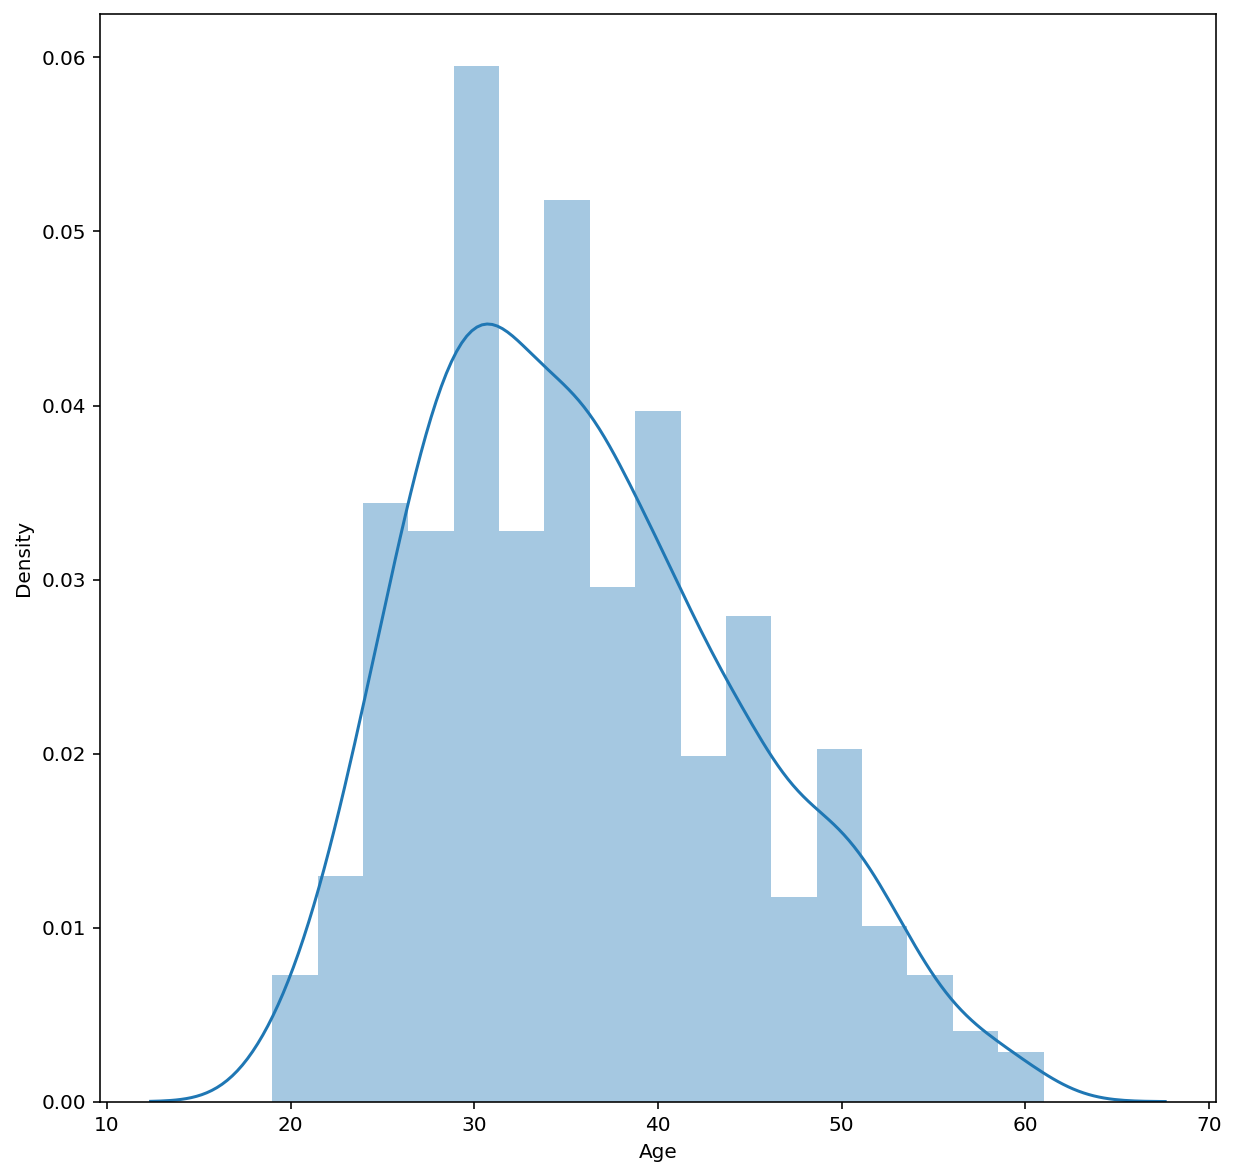

In [59]:
plt.figure(figsize = (10,10))

sns.distplot(visitors['Age'], kde = True);

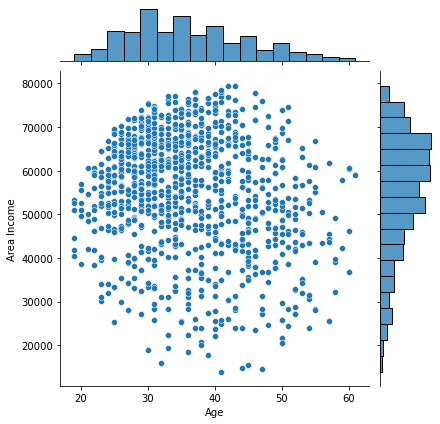

In [7]:
sns.jointplot(x='Age', y='Area Income', data=visitors)

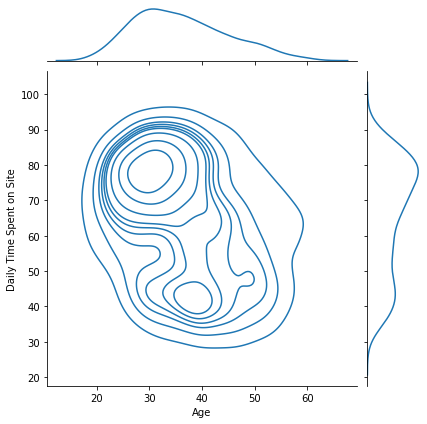

In [8]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', data=visitors, kind='kde')

Here I examine the correlation of various attributes.

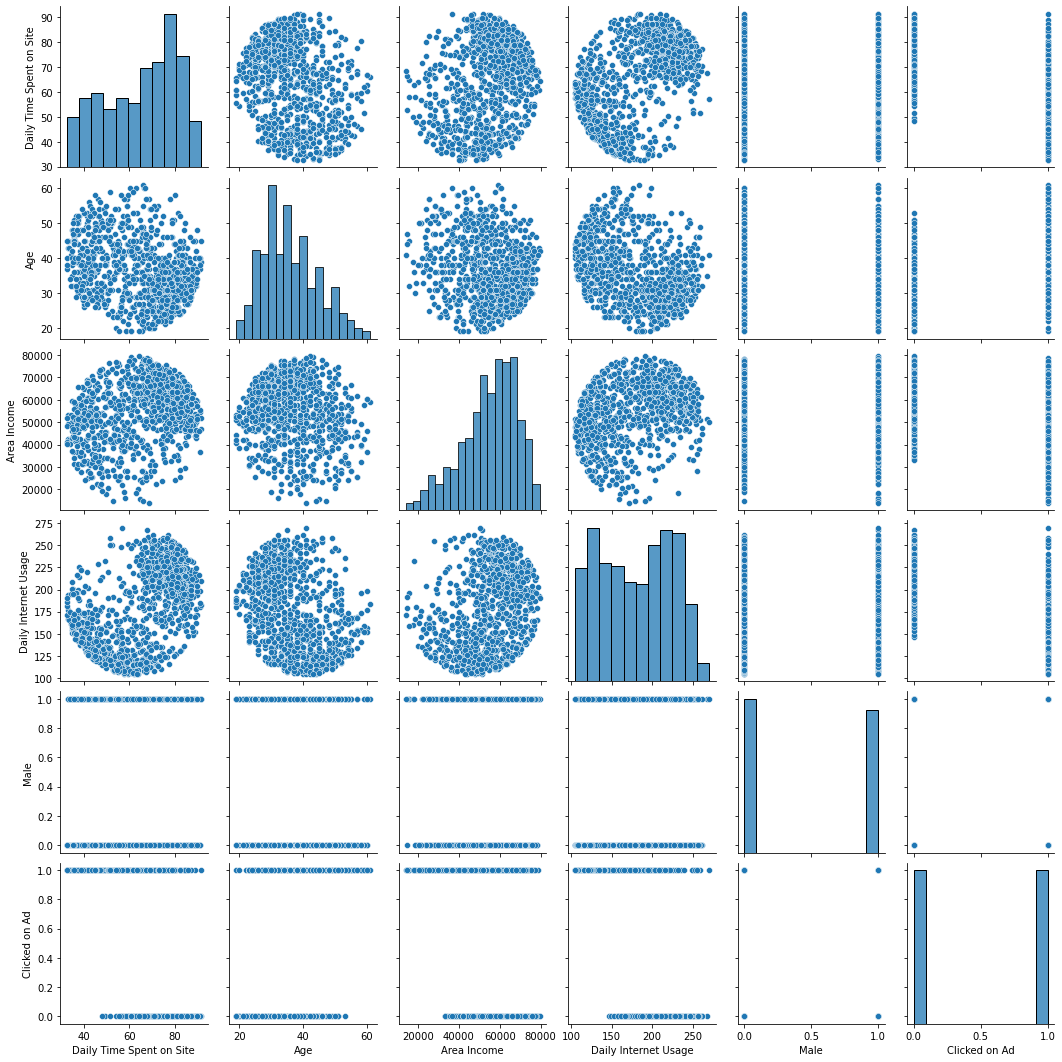

In [9]:
sns.pairplot(data=visitors)

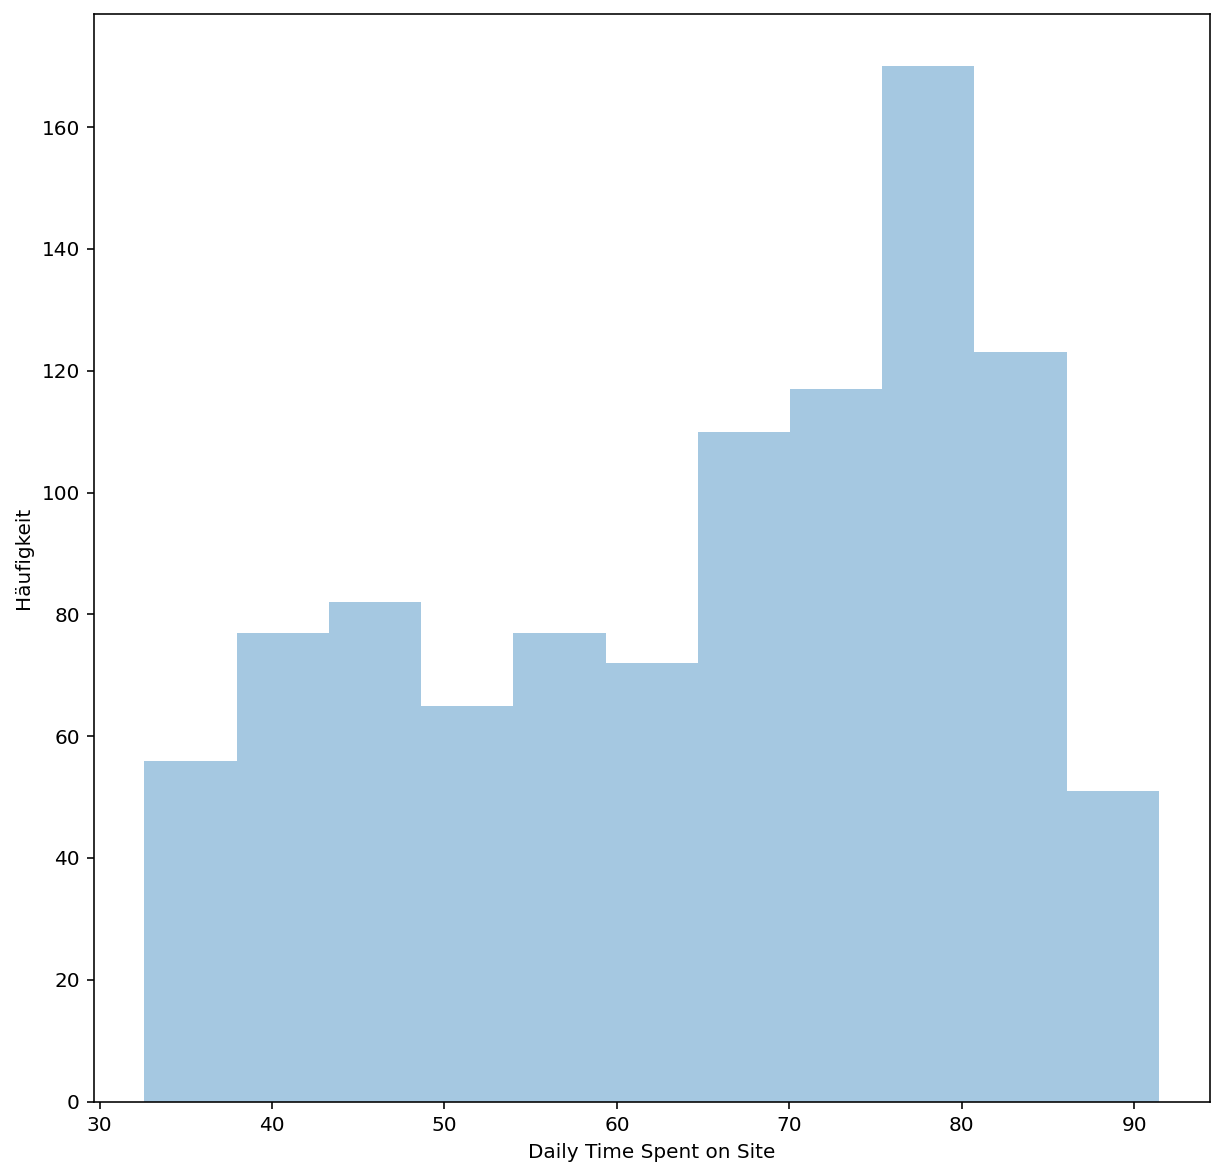

In [92]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Daily Time Spent on Site'], kde = False)
fig.set(xlabel='Daily Time Spent on Site', ylabel='Häufigkeit');

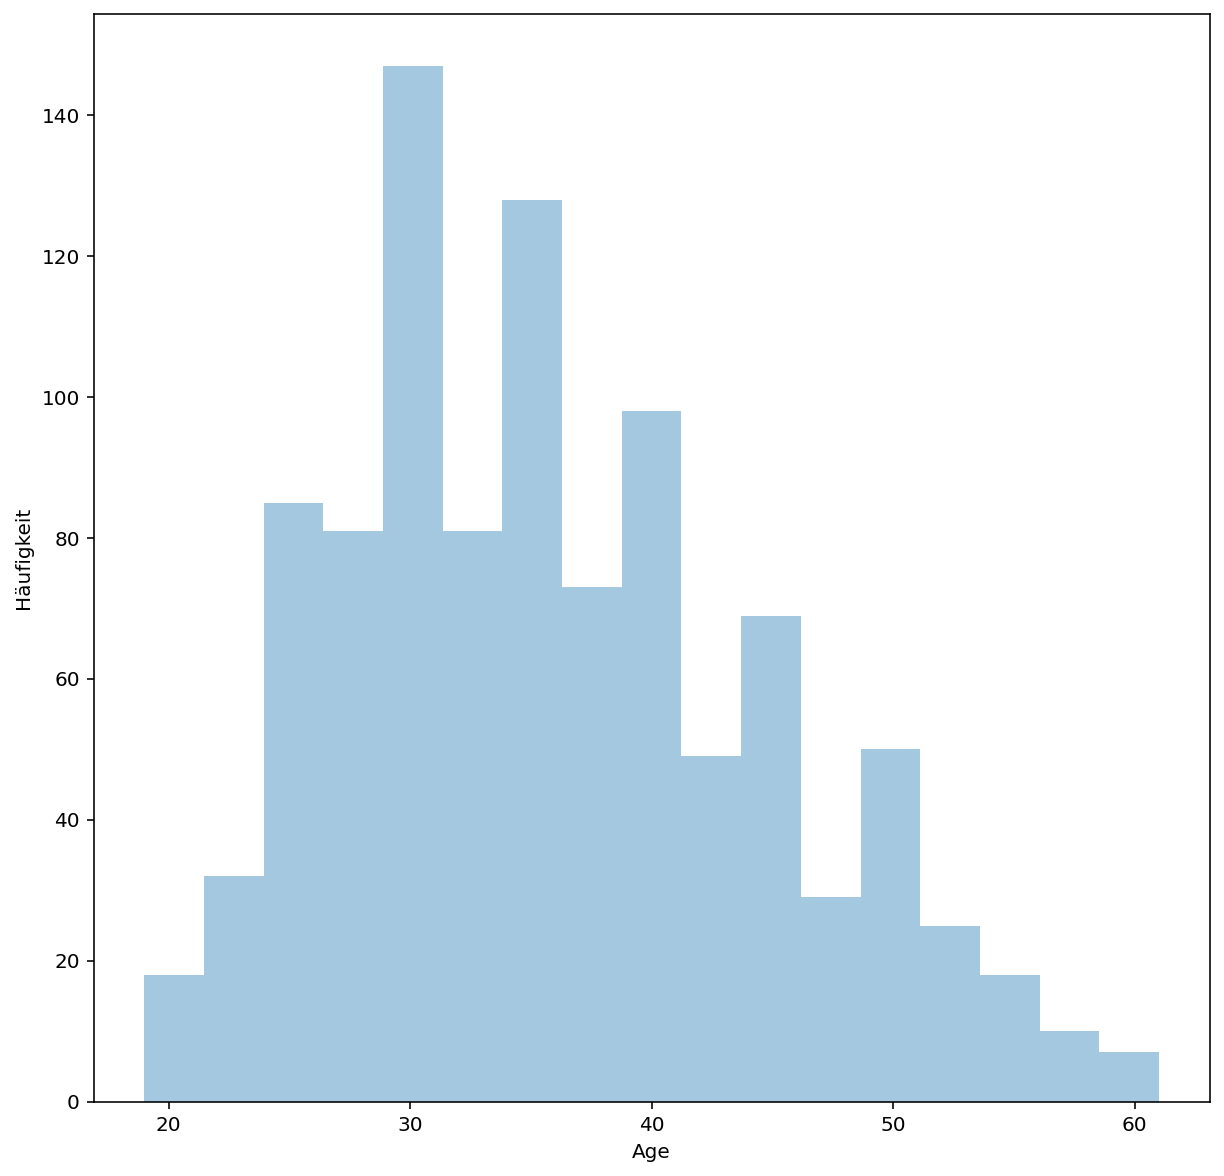

In [91]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Age'], kde = False)
fig.set(xlabel='Age', ylabel='Häufigkeit');

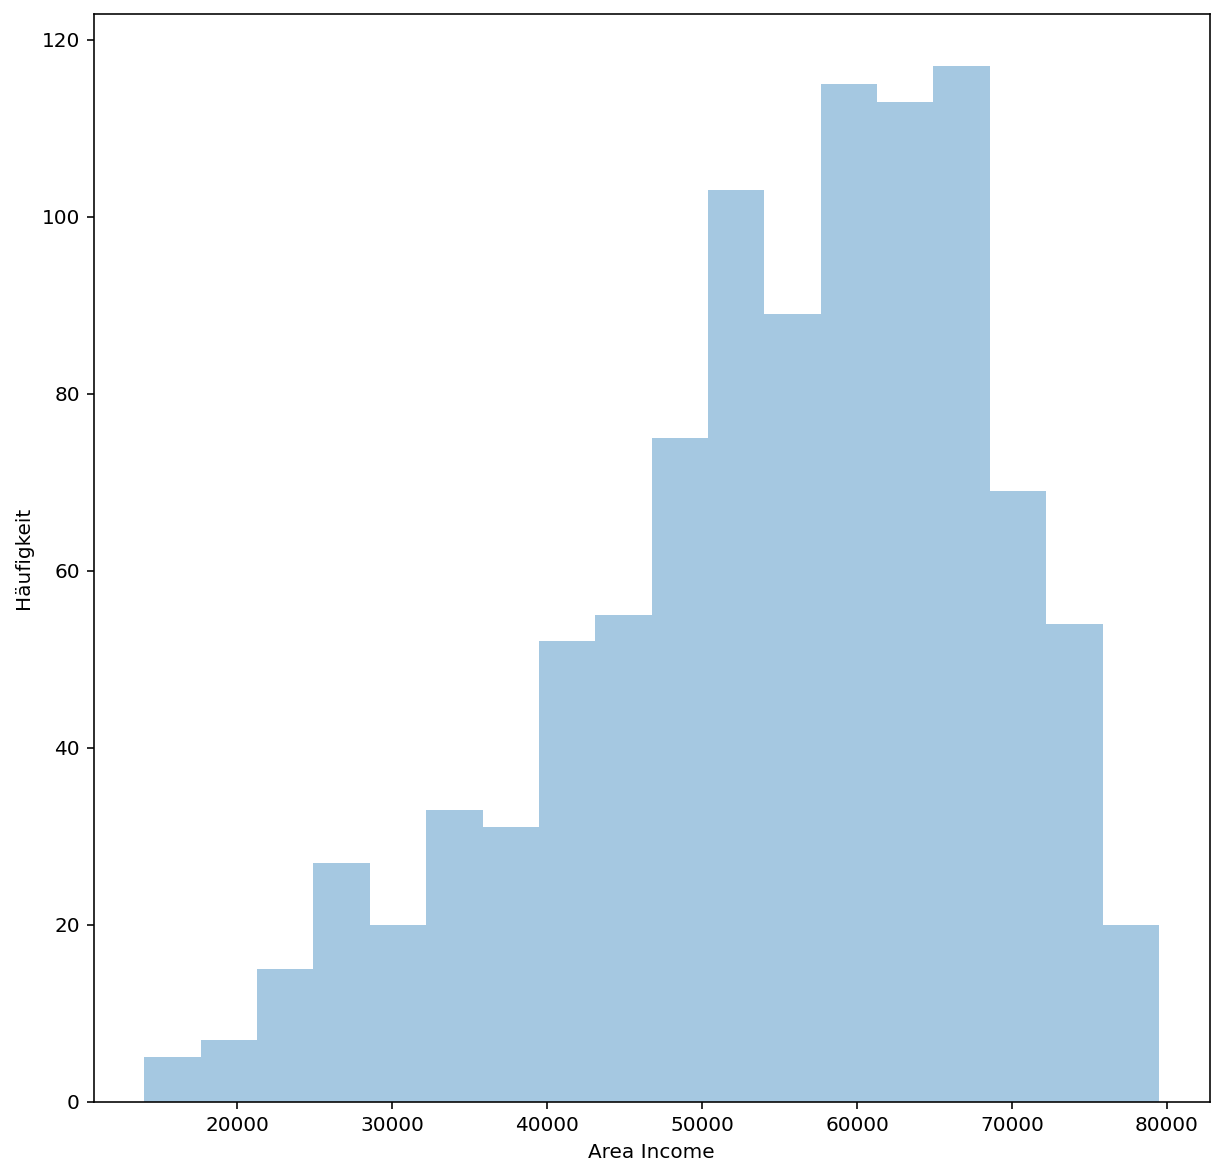

In [89]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Area Income'], kde = False)
fig.set(xlabel='Area Income', ylabel='Häufigkeit');


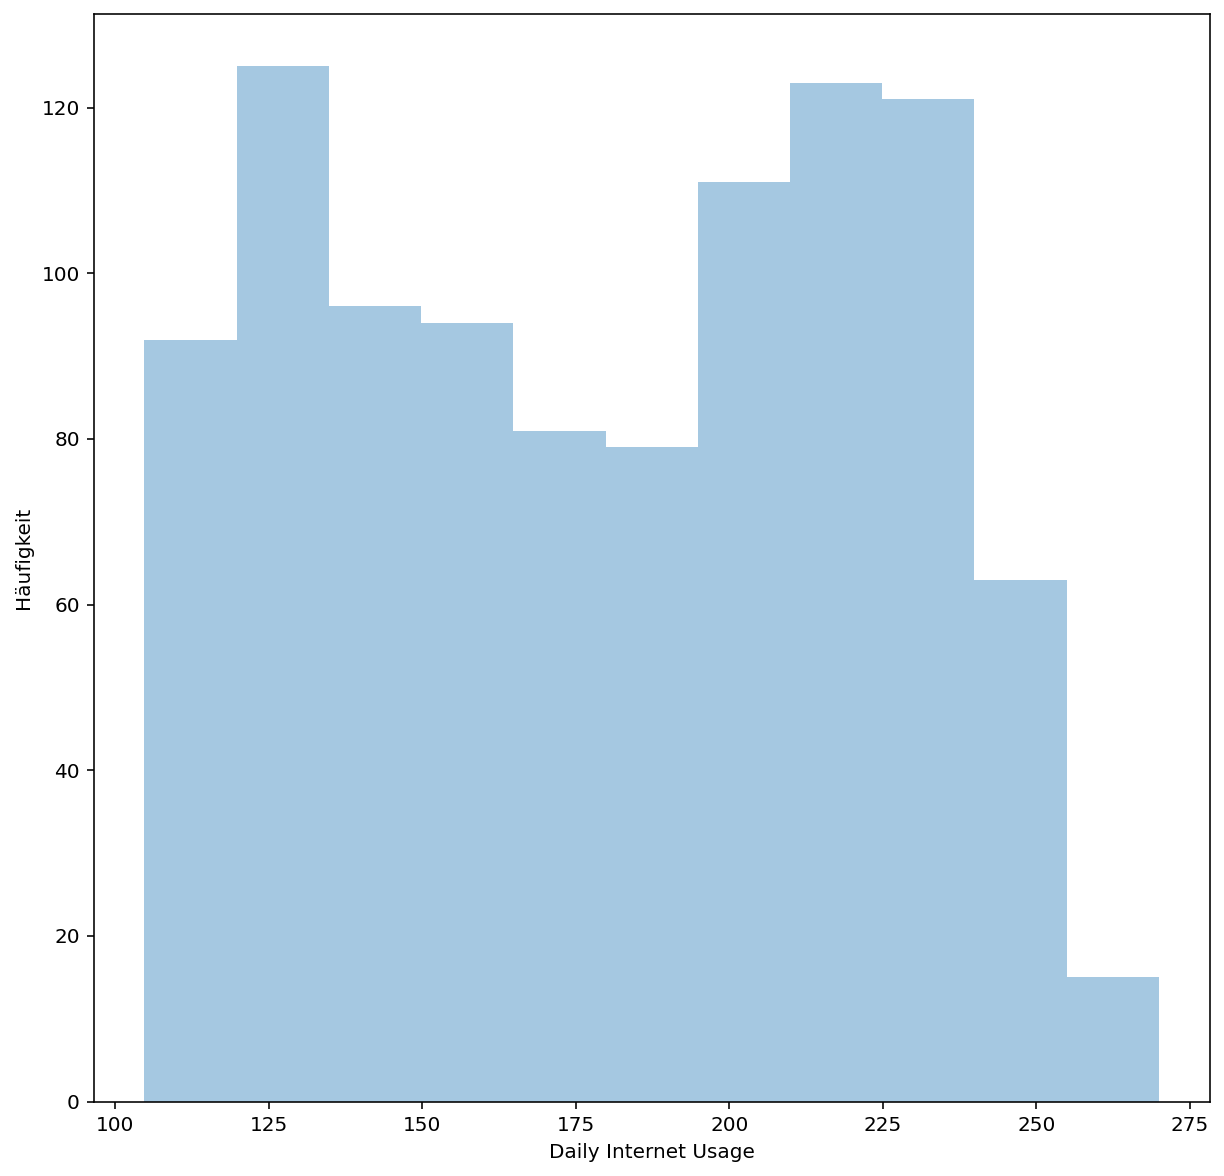

In [93]:
plt.figure(figsize = (10,10))

fig = sns.distplot(visitors['Daily Internet Usage'], kde = False)
fig.set(xlabel='Daily Internet Usage', ylabel='Häufigkeit');


<Figure size 720x720 with 0 Axes>

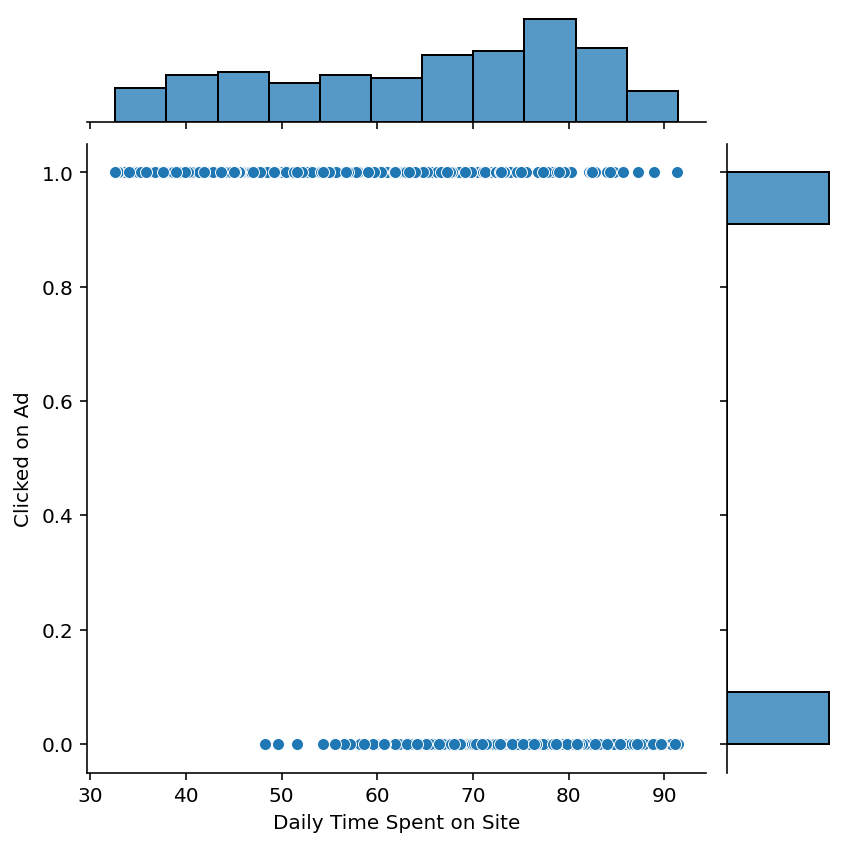

In [70]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Daily Time Spent on Site", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

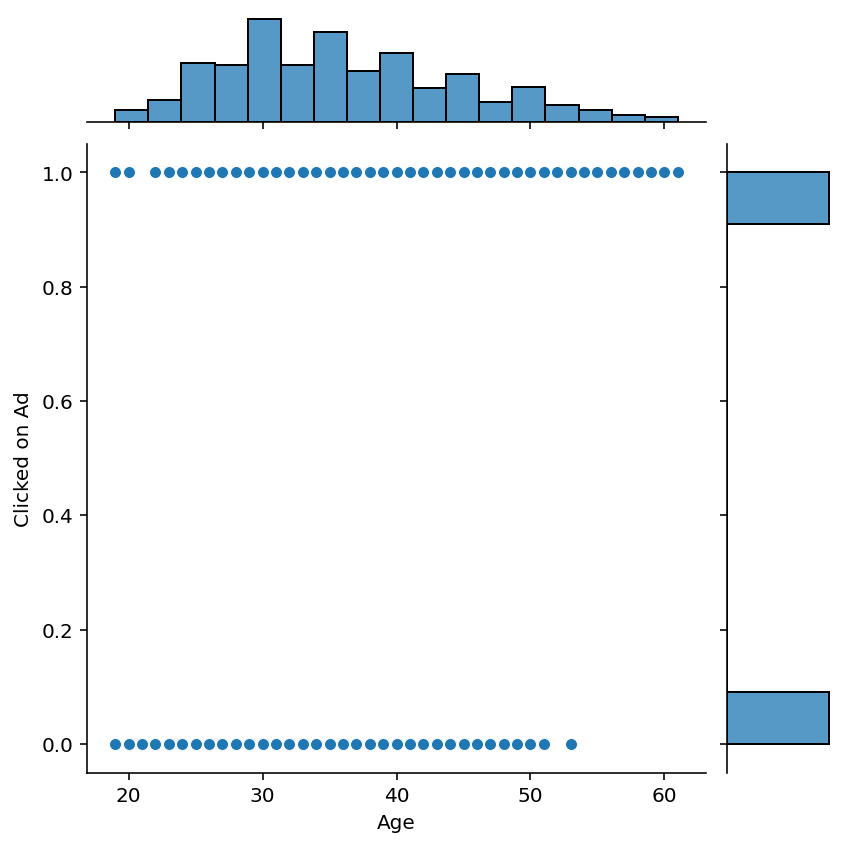

In [73]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Age", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

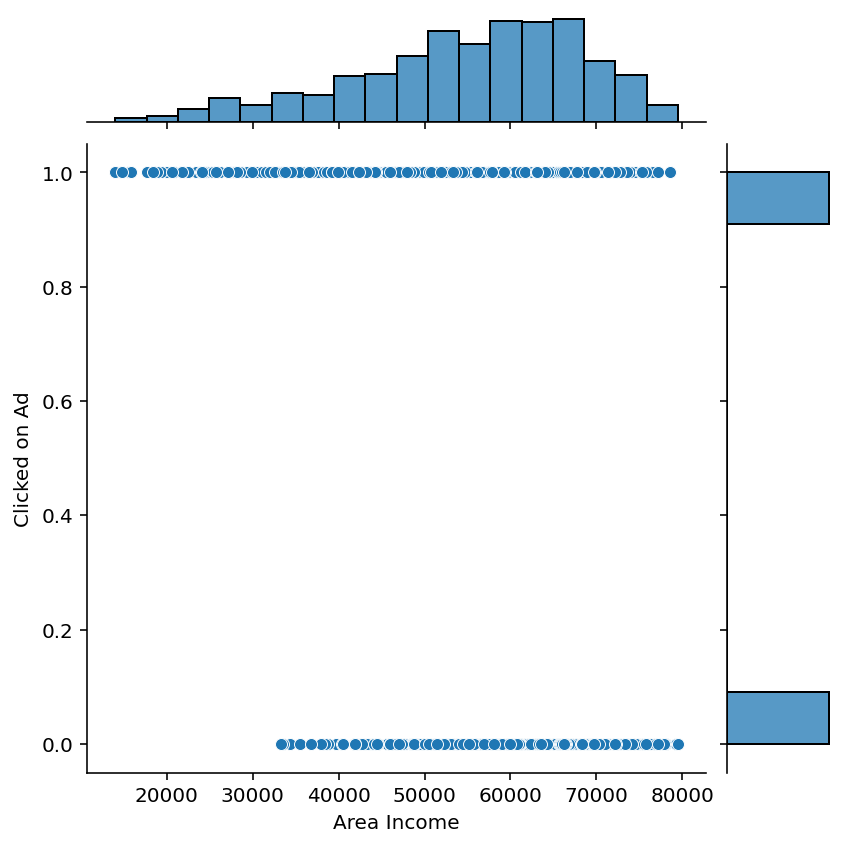

In [74]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Area Income", y = "Clicked on Ad", data = visitors);

<Figure size 720x720 with 0 Axes>

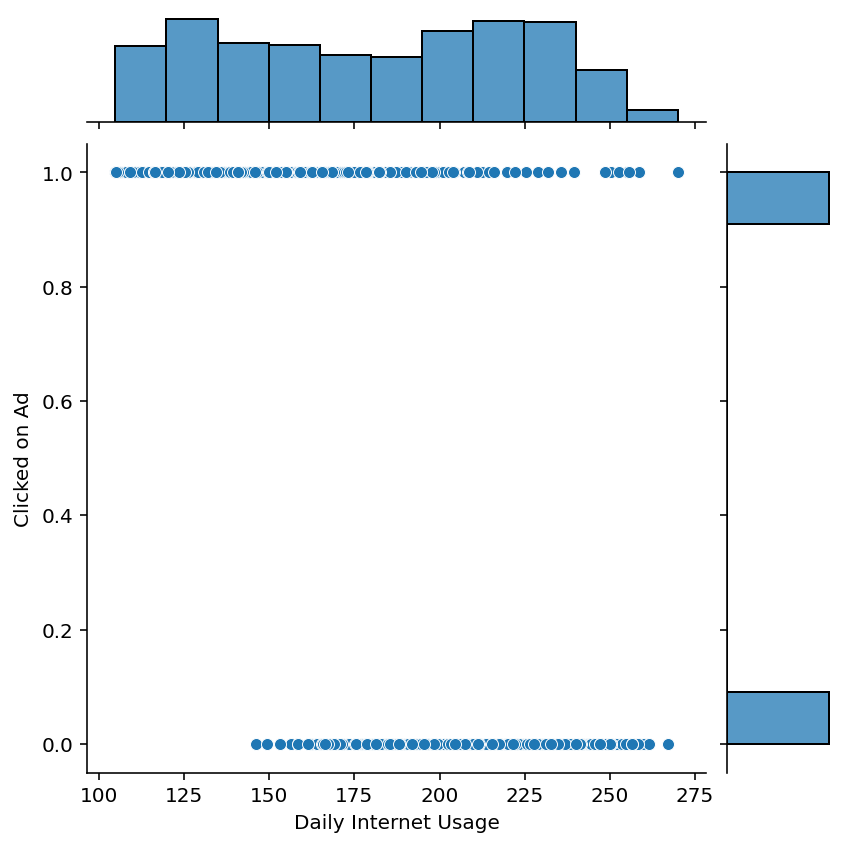

In [75]:
plt.figure(figsize = (10, 10))

sns.jointplot(x = "Daily Internet Usage", y = "Clicked on Ad", data = visitors);

Same data presented as a corelation Matrix

<AxesSubplot:>

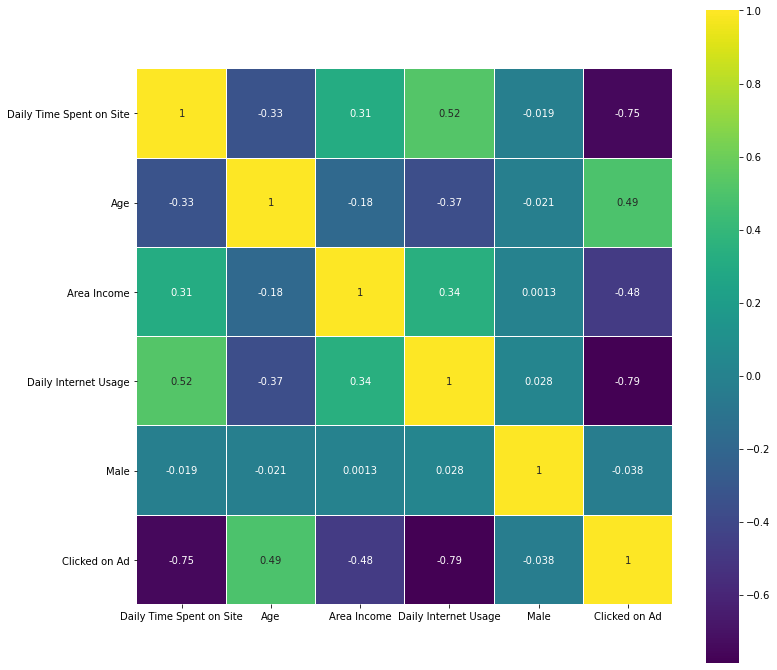

In [10]:
visitors_num = visitors.drop(['Ad Topic Line','City','Country','Timestamp'],axis=1)
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(visitors_num.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

Daily Internet Usage/Daily Time Spent on Site  --> Clicked on Ad

In [11]:
X = visitors[['Daily Time Spent on Site','Daily Internet Usage']].values
Y = visitors['Clicked on Ad'].values
XX = X.reshape((-1,2))
YY = Y.reshape((-1,1))

Here we divide our data into training and test sets. Cross-validation does not take place. Standardization is also not necessary.

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, YY, test_size = 0.2, random_state=42)
Y_train = Y_train.reshape((-1,))

### Training des Modells

#### Aufgabe

Now we select our model and carry out the necessary imports. A logistic regression should be carried out using only a linear classifier. So you can assume a non-curved decision boundary.

In [42]:
model = logit()

#### Aufgabe

Trainieren Sie Ihr Modell.

In [43]:
model.fit(X_train, Y_train)

LogisticRegression()

In [44]:
model.intercept_

array([22.86710937])

In [45]:
model.coef_

array([[-0.14114625, -0.07361843]])

### Validation and evaluation

Now  we apply our model to the test data and generate predictions. It is best to store the predictions in a variable.

In [15]:
yp = model.predict(X_train)
yp_test = model.predict(X_test)

we generate a classification report to validate your model.

In [16]:
model.score(X_test, Y_test)

0.925

In [17]:
accuracy_score(yp_test, Y_test)

0.925

In [18]:
print(classification_report(yp_test, Y_test))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        92
           1       0.92      0.94      0.93       108

    accuracy                           0.93       200
   macro avg       0.93      0.92      0.92       200
weighted avg       0.93      0.93      0.92       200



Now  we examine the classification visually by creating multiple plots that examine the different features against each other (2D plots!!!!). Use the **Plot Classifier** module (helper.py) to draw the **Decision Boundary** in these scatterplots.

In [20]:
from helper import plot_classifier as pc

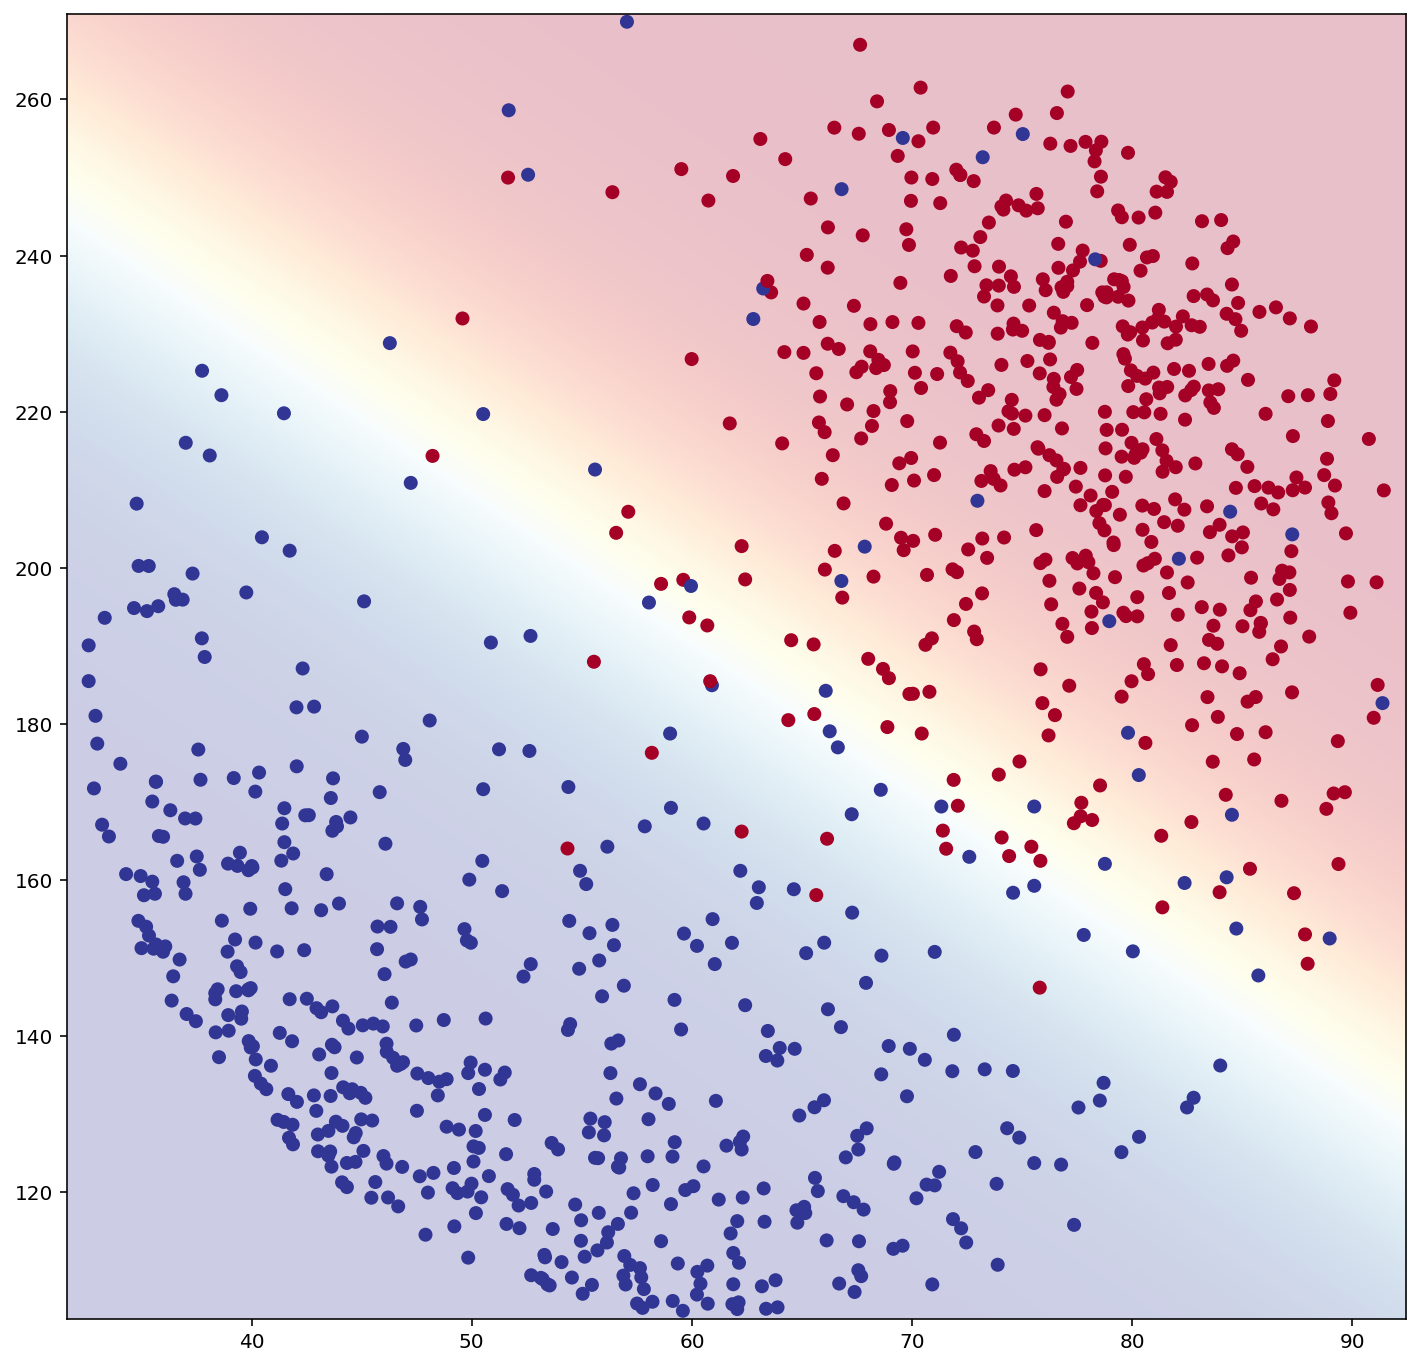

In [21]:
plt.figure(figsize=(12,12))
pc(model, XX, YY, proba=True)

### <u>Präsentation:</u> Presentation: conclusions and recommendations

Beraten Sie Ihren Auftraggeber:
- Was haben Sie im Laufe der Untersuchung festgestellt?
- Was können Sie über die kritischen Nutzereigenschaften aussagen?
- Welche Merkmalsausprägungen führen zu Clicks?
- Was können Sie für die Zukunft empfehlen, d.h.
- Welche Veränderungen sollten vorgenommen werden?

### 1D Daily Time Spent on Site

In [22]:
X1 = visitors[['Daily Time Spent on Site']].values
Y1 = visitors['Clicked on Ad'].values
XX1 = X1.reshape((-1,1))
YY1 = Y1.reshape((-1,1))

X1_train, X1_test, Y1_train, Y1_test = train_test_split(XX1, YY1, test_size = 0.2, random_state=42)
Y1_train = Y1_train.reshape((-1,))

model1 = logit()
model1.fit(X1_train, Y1_train)

model1.score(X1_test, Y1_test)

0.87

In [23]:
yp1 = model1.predict(X1_train)
yp1_test = model1.predict(X1_test)

print(classification_report(yp1_test, Y1_test))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86        99
           1       0.84      0.92      0.88       101

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



### 1D Daily Internet Usage

In [24]:
X2 = visitors[['Daily Internet Usage']].values
Y2 = visitors['Clicked on Ad'].values
XX2 = X2.reshape((-1,1))
YY2 = Y2.reshape((-1,1))

X2_train, X2_test, Y2_train, Y2_test = train_test_split(XX2, YY2, test_size = 0.2, random_state=42)
Y2_train = Y2_train.reshape((-1,))

model2 = logit()
model2.fit(X2_train, Y2_train)

model2.score(X2_test, Y2_test)

0.825

### 1D Age

In [25]:
X3 = visitors[['Age']].values
Y3 = visitors['Clicked on Ad'].values
XX3 = X3.reshape((-1,1))
YY3 = Y3.reshape((-1,1))

X3_train, X3_test, Y3_train, Y3_test = train_test_split(XX3, YY3, test_size = 0.2, random_state=42)
Y3_train = Y3_train.reshape((-1,))

model3 = logit()
model3.fit(X3_train, Y3_train)

model3.score(X3_test, Y3_test)

0.75

### 1D Area Income

In [26]:
X4 = visitors[['Area Income']].values
Y4 = visitors['Clicked on Ad'].values
XX4 = X4.reshape((-1,1))
YY4 = Y4.reshape((-1,1))

X4_train, X4_test, Y4_train, Y4_test = train_test_split(XX4, YY4, test_size = 0.2, random_state=42)
Y4_train = Y4_train.reshape((-1,))

model4 = logit()
model4.fit(X4_train, Y4_train)

model4.score(X4_test, Y4_test)

0.445

## 2D Area; Age

In [27]:
X5 = visitors[['Area Income', 'Age']].values
Y5 = visitors['Clicked on Ad'].values
XX5 = X5.reshape((-1,2))
YY5 = Y5.reshape((-1,1))

X5_train, X5_test, Y5_train, Y5_test = train_test_split(XX5, YY5, test_size = 0.2, random_state=42)
Y5_train = Y5_train.reshape((-1,))

model5 = logit()
model5.fit(X5_train, Y5_train)

model5.score(X5_test, Y5_test)

0.78

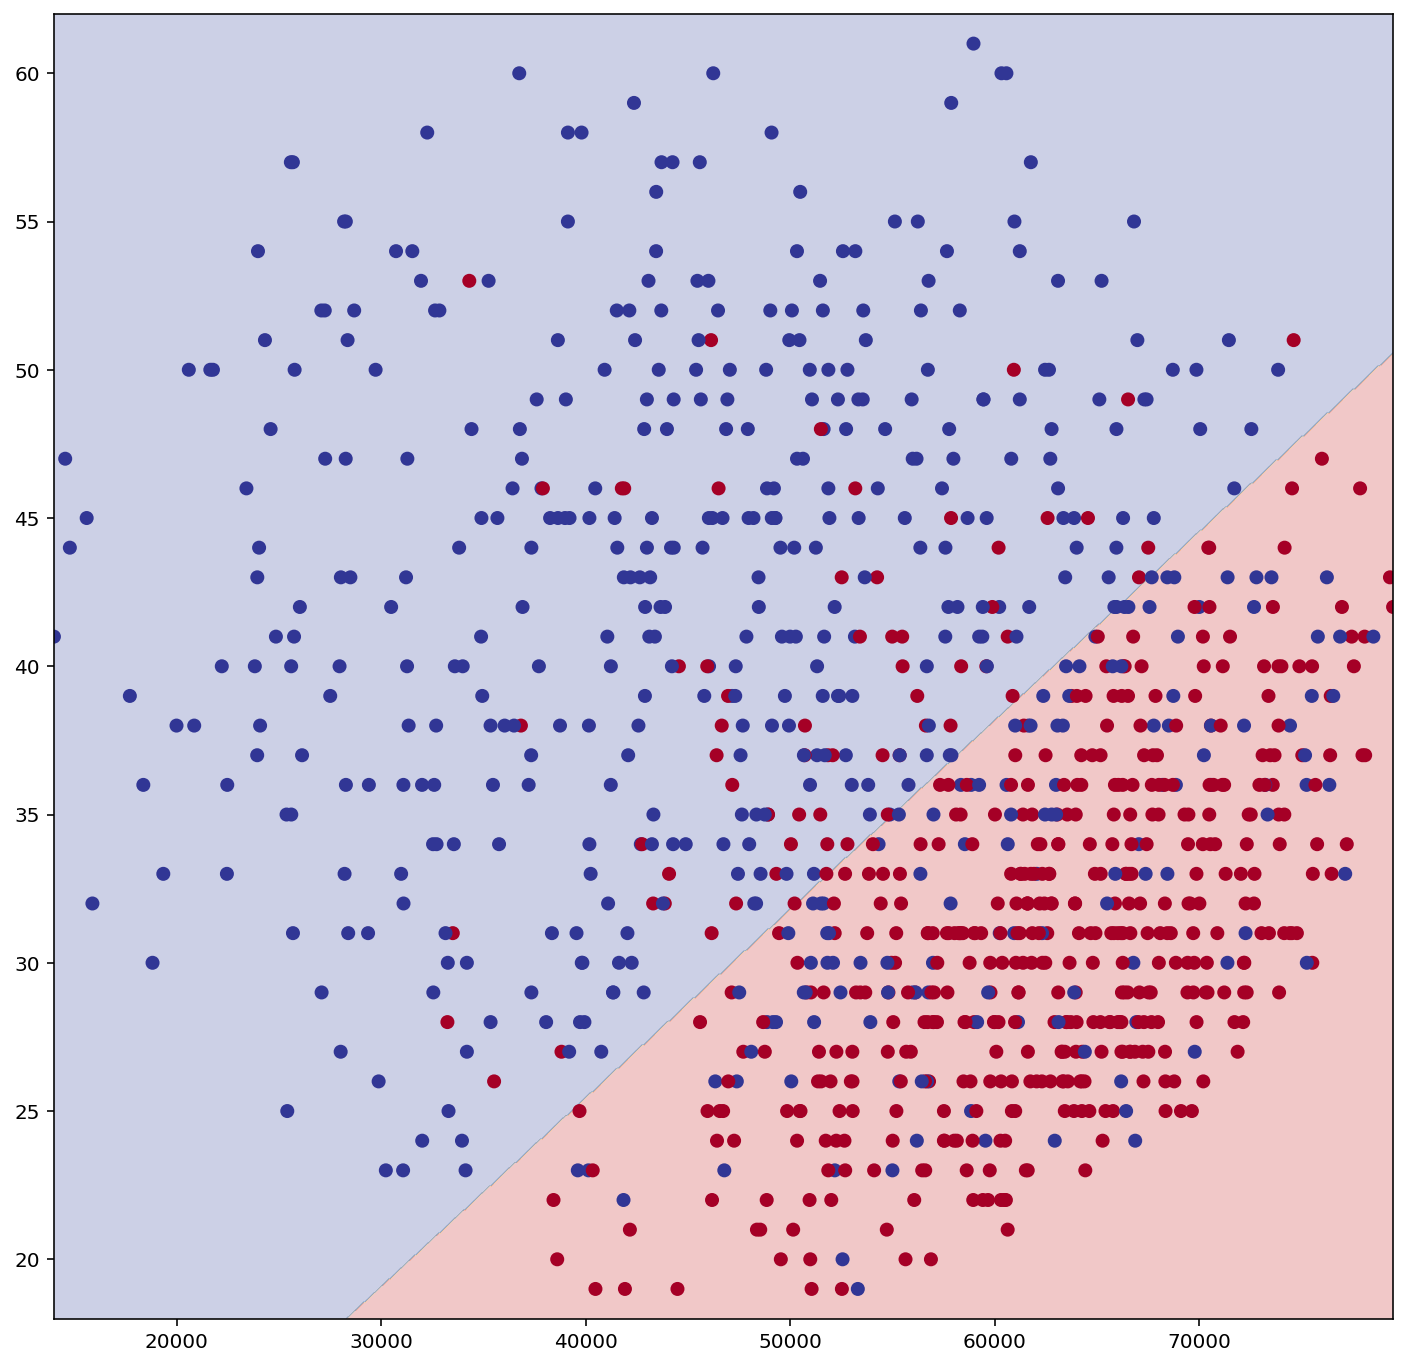

In [28]:
plt.figure(figsize=(12,12))
pc(model5, XX5, YY5)

## 2D Area /Usage

ModelScore: 0.63


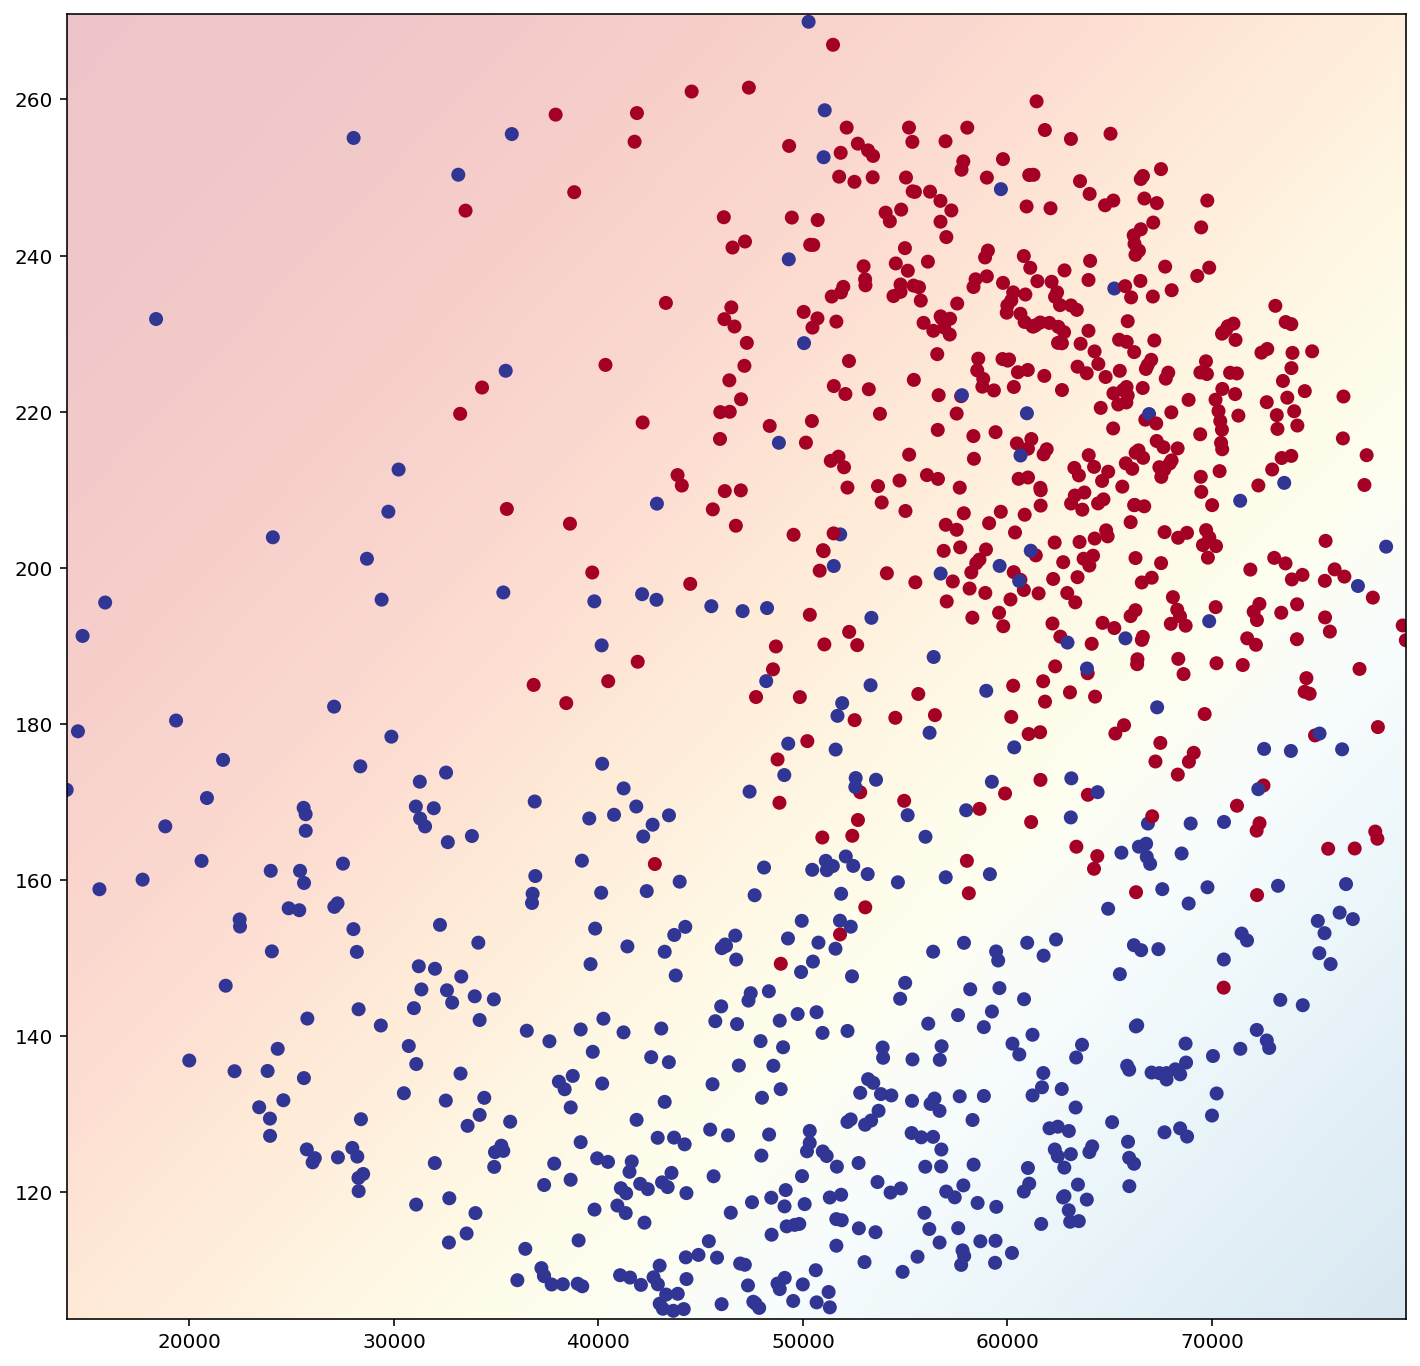

In [29]:
X6 = visitors[['Area Income', 'Daily Internet Usage']].values
Y6 = visitors['Clicked on Ad'].values
XX6 = X6.reshape((-1,2))
YY6 = Y6.reshape((-1,1))

X6_train, X6_test, Y6_train, Y6_test = train_test_split(XX6, YY6, test_size = 0.2, random_state=42)
Y6_train = Y6_train.reshape((-1,))

model6 = logit()
model6.fit(X6_train, Y6_train)

print("ModelScore:", model6.score(X6_test, Y6_test))

plt.figure(figsize=(12,12))
pc(model6, XX6, YY6, proba=True)

## 2D Area / Spent

ModelScore: 0.655


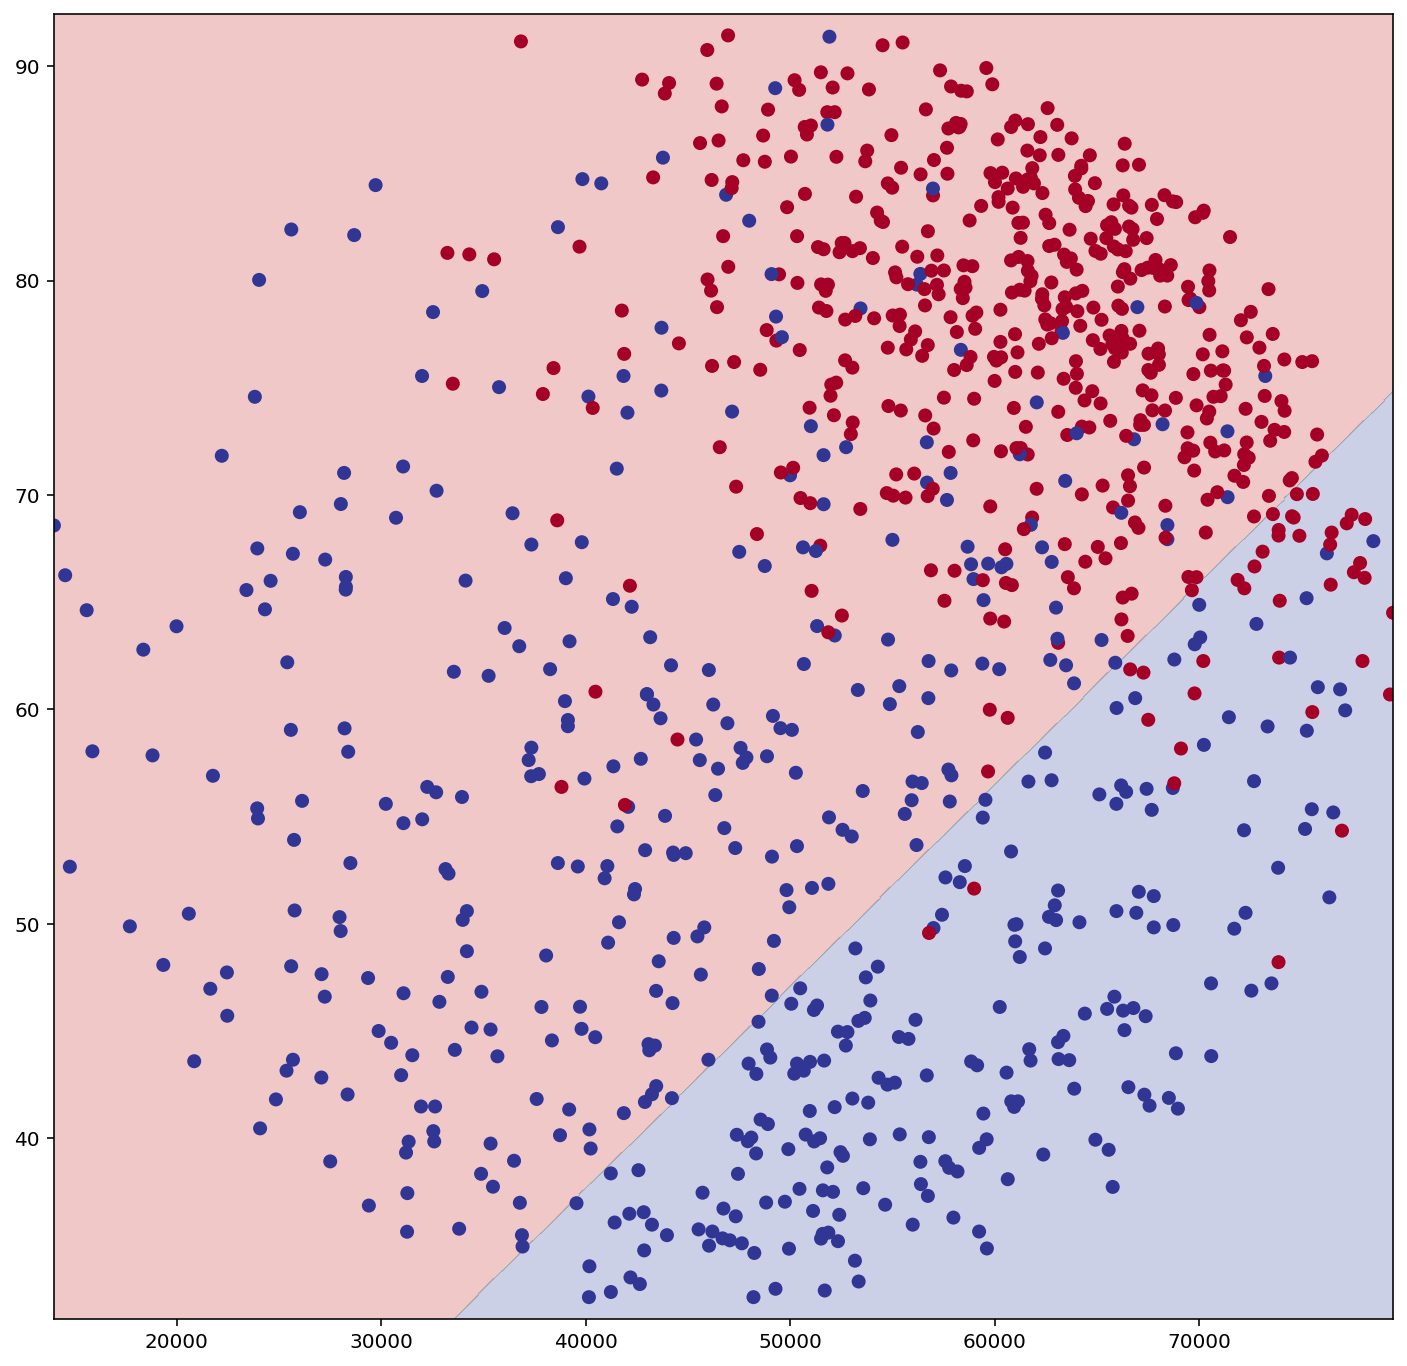

In [30]:
X7 = visitors[['Area Income', 'Daily Time Spent on Site']].values
Y7 = visitors['Clicked on Ad'].values
XX7 = X7.reshape((-1,2))
YY7 = Y7.reshape((-1,1))

X7_train, X7_test, Y7_train, Y7_test = train_test_split(XX7, YY7, test_size = 0.2, random_state=42)
Y7_train = Y7_train.reshape((-1,))

model7 = logit()
model7.fit(X7_train, Y7_train)

print("ModelScore:", model7.score(X7_test, Y7_test))

plt.figure(figsize=(12,12))
pc(model7, XX7, YY7)

## 2D Age/Usage

ModelScore: 0.855


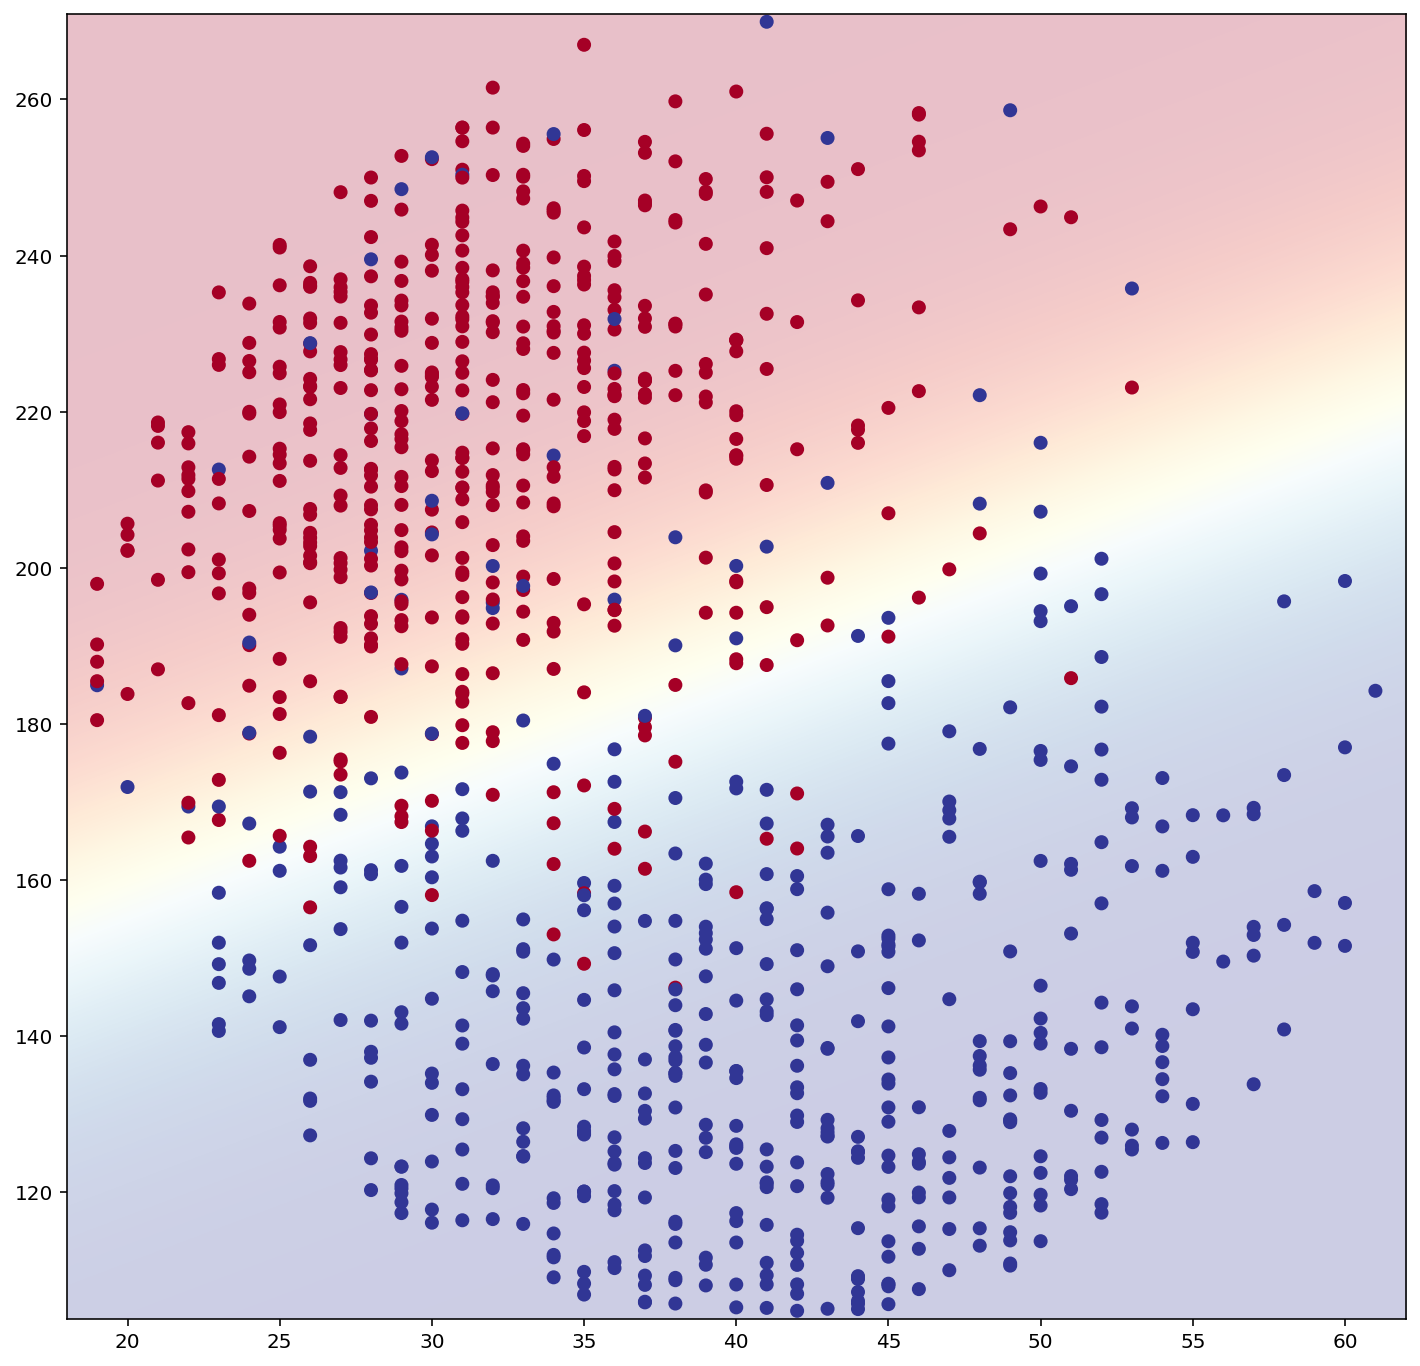

In [31]:
X8 = visitors[['Age', 'Daily Internet Usage']].values
Y8 = visitors['Clicked on Ad'].values
XX8 = X8.reshape((-1,2))
YY8 = Y8.reshape((-1,1))

X8_train, X8_test, Y8_train, Y8_test = train_test_split(XX8, YY8, test_size = 0.2, random_state=42)
Y8_train = Y8_train.reshape((-1,))

model8 = logit()
model8.fit(X8_train, Y8_train)

print("ModelScore:", model8.score(X8_test, Y8_test))

plt.figure(figsize=(12,12))
pc(model8, XX8, YY8, proba=True)

## 2D Age/Spent

ModelScore: 0.925


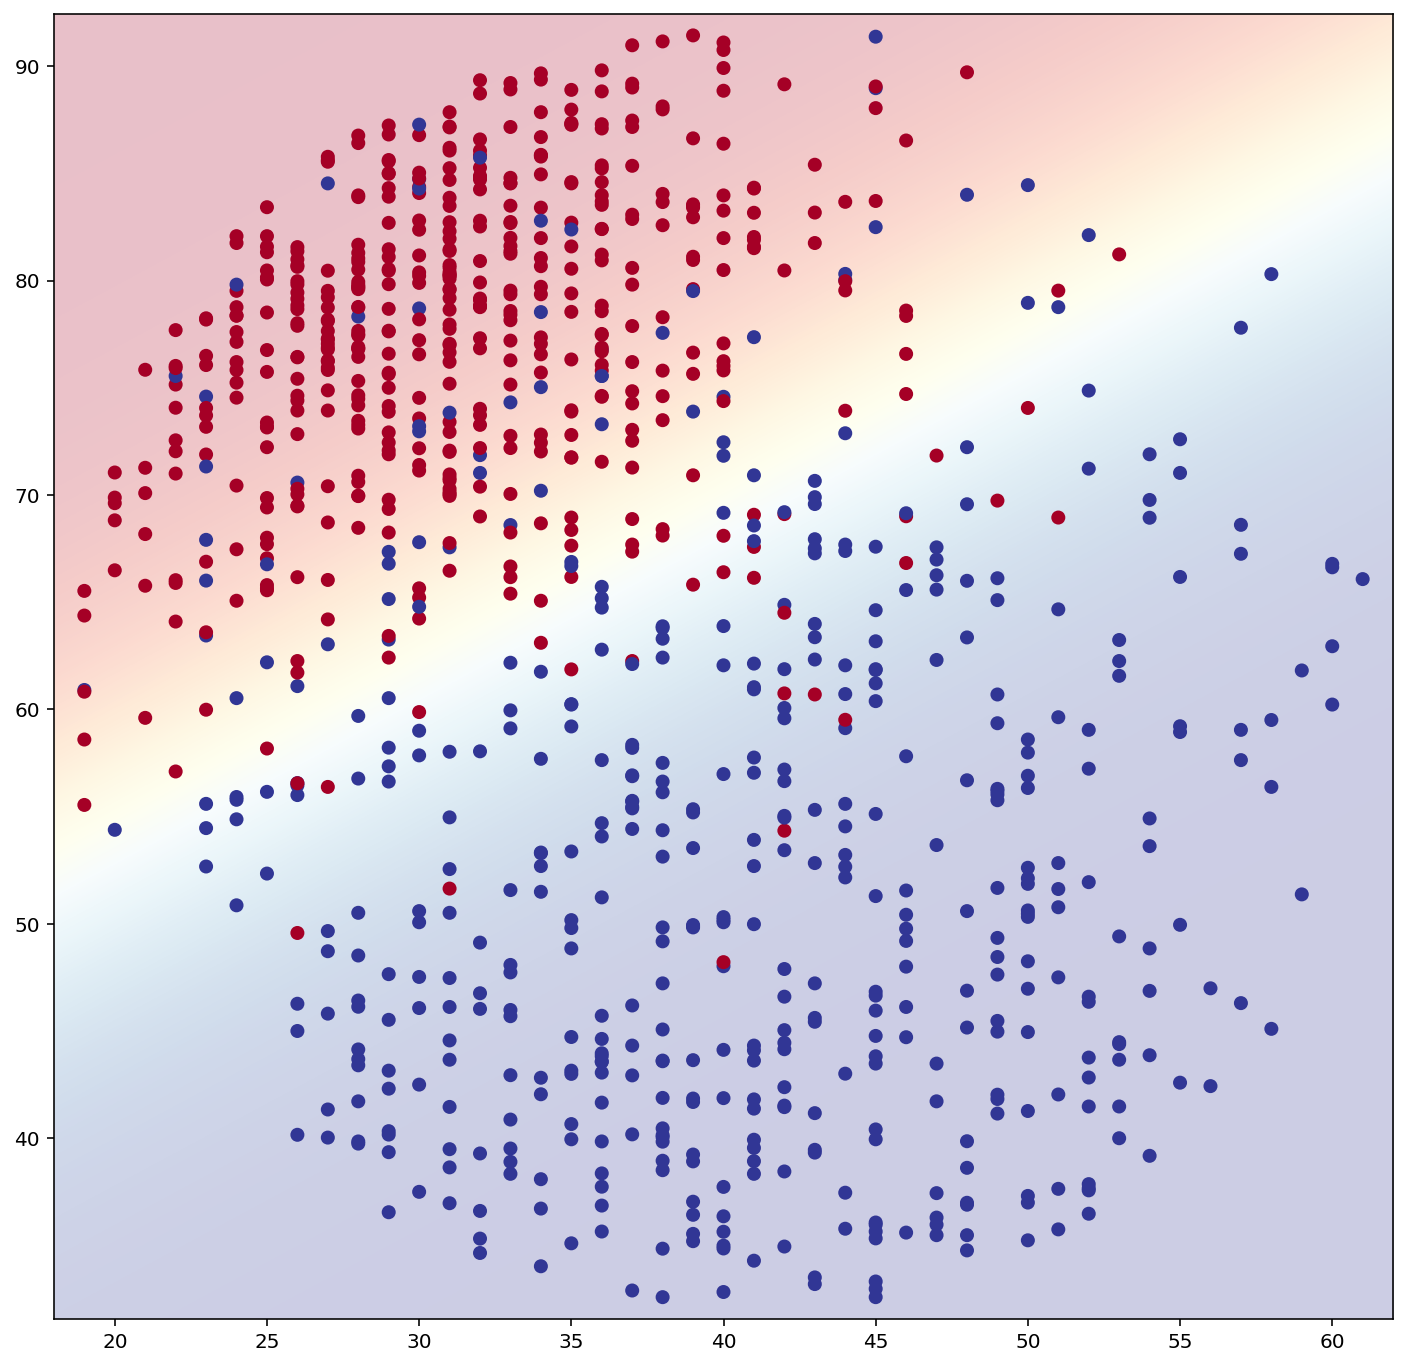

In [32]:
X9 = visitors[['Age', 'Daily Time Spent on Site']].values
Y9 = visitors['Clicked on Ad'].values
XX9 = X9.reshape((-1,2))
YY9 = Y9.reshape((-1,1))

X9_train, X9_test, Y9_train, Y9_test = train_test_split(XX9, YY9, test_size = 0.2, random_state=42)
Y9_train = Y9_train.reshape((-1,))

model9 = logit()
model9.fit(X9_train, Y9_train)
yp9 = model9.predict(X9_train)
yp9_test = model9.predict(X9_test)

print("ModelScore:", model9.score(X9_test, Y9_test))

plt.figure(figsize=(12,12))
pc(model9, XX9, YY9, proba=True)

In [33]:
model9.score(XX9, YY9)

0.903

In [34]:
model.score(XX, YY)

0.946

## 3D Age/Usage/Spent

In [35]:
Xö = visitors[['Age', 'Daily Internet Usage', 'Daily Time Spent on Site']].values
Yö = visitors['Clicked on Ad'].values
XXö = Xö.reshape((-1,3))
YYö = Yö.reshape((-1,1))

Xö_train, Xö_test, Yö_train, Yö_test = train_test_split(XXö, YYö, test_size = 0.2, random_state=42)
Yö_train = Yö_train.reshape((-1,))

modelö = logit()
modelö.fit(Xö_train, Yö_train)

print("ModelScore:", modelö.score(Xö_test, Yö_test))


ModelScore: 0.93


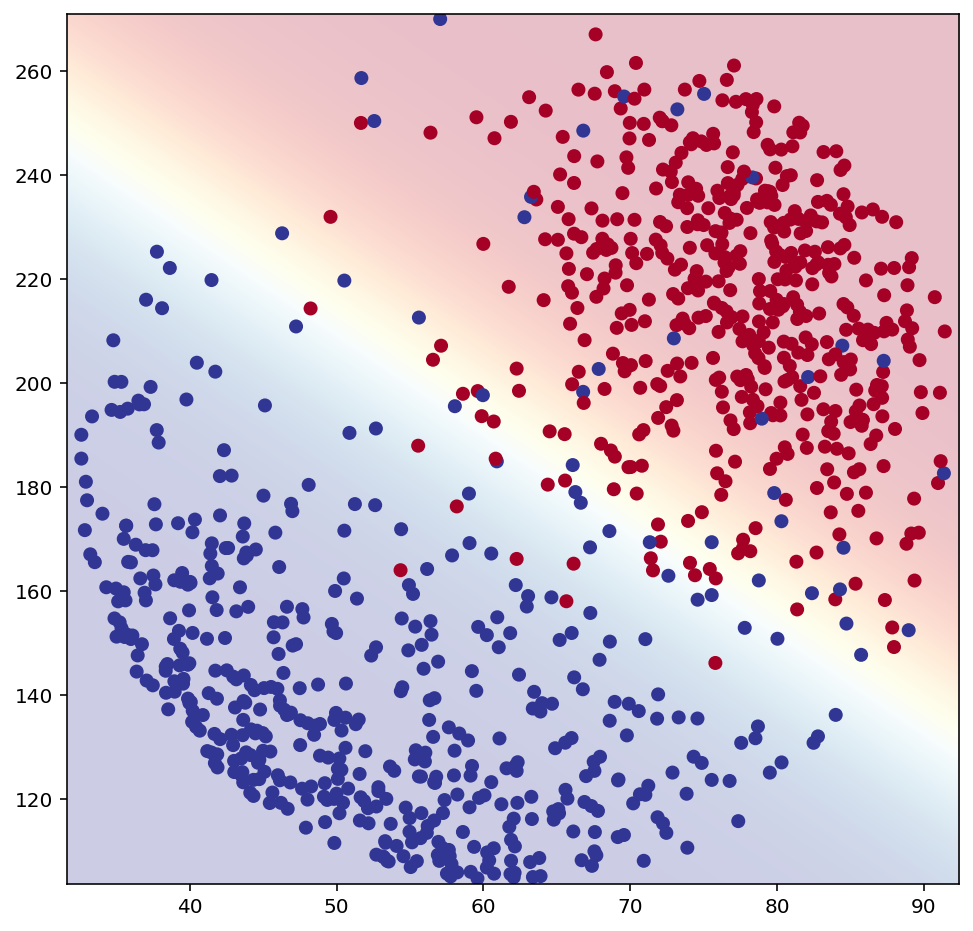

In [36]:
plt.figure(figsize=(8,8))
pc(model, XX, YY, proba=True)

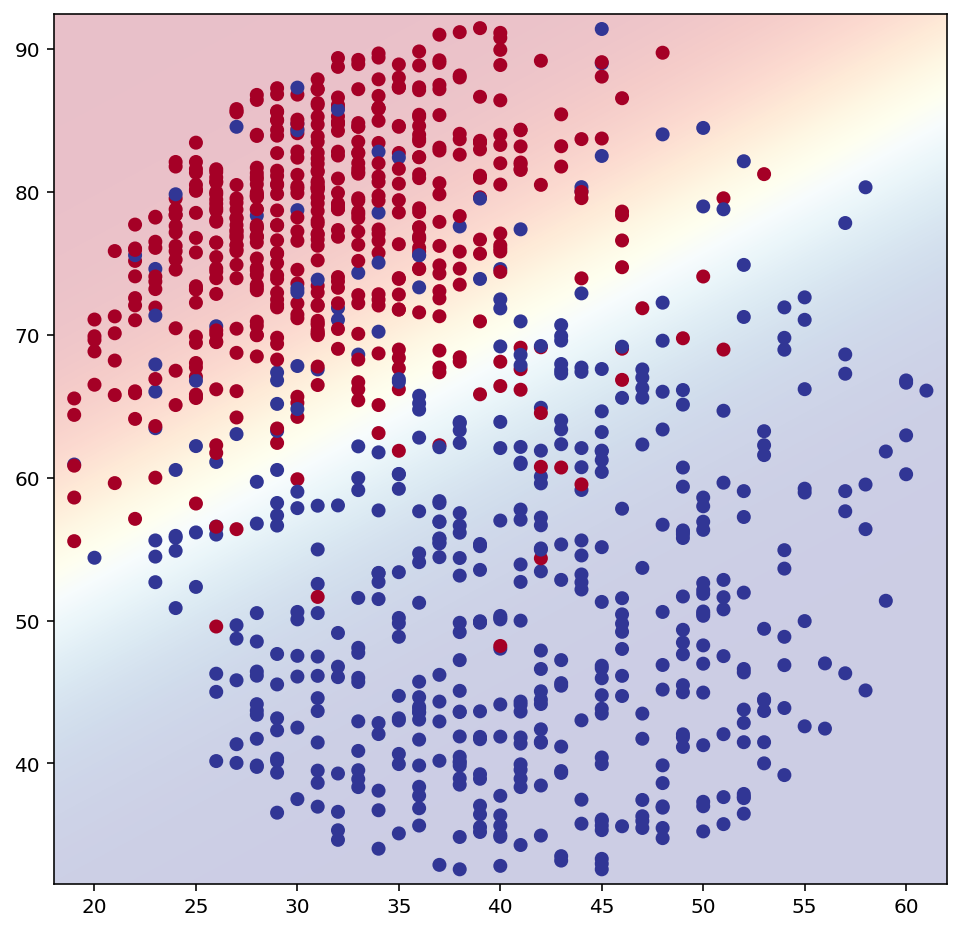

In [37]:
plt.figure(figsize=(8,8))
pc(model9, XX9, YY9, proba=True)

## Timestamp Untersuchung

In [38]:
visitors_time = pd.DataFrame()
visitors_time['hour'] = pd.to_datetime(visitors['Timestamp']).dt.hour
visitors_time['weekday'] = pd.to_datetime(visitors['Timestamp']).dt.dayofweek
visitors_time['Clicked on Ad'] = visitors['Clicked on Ad']

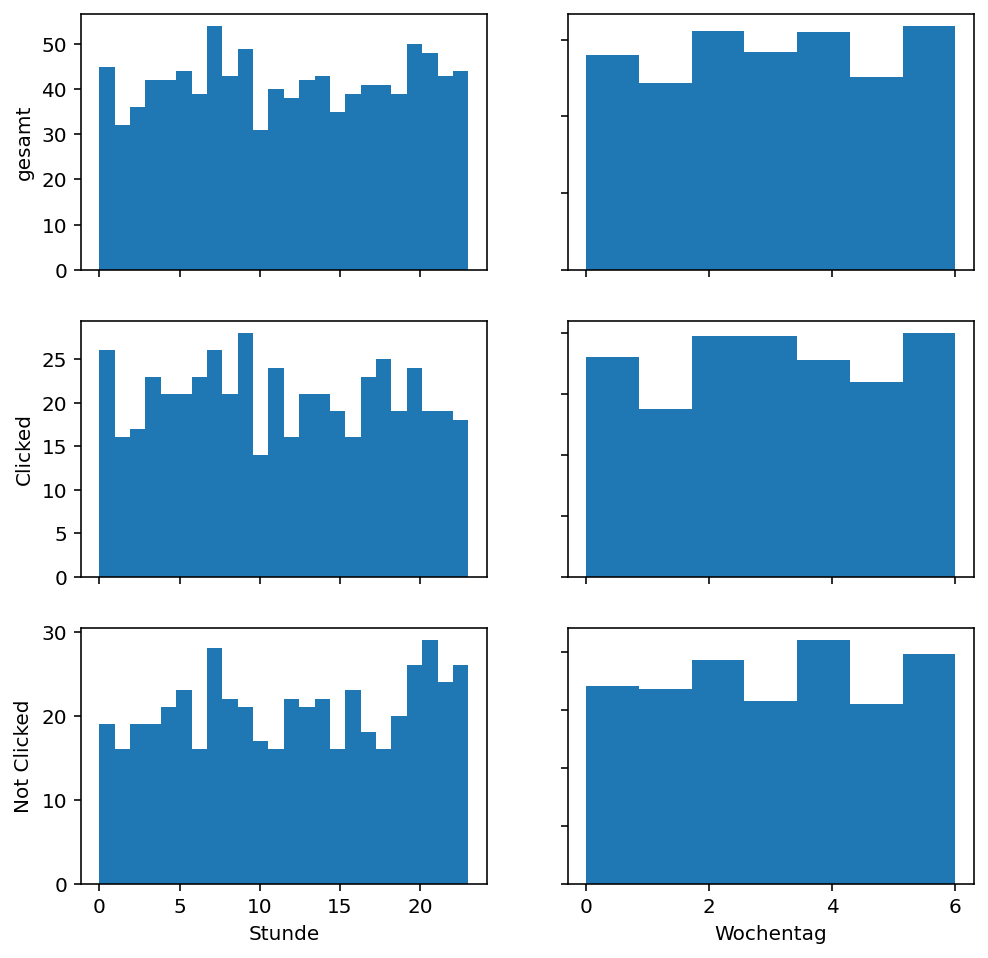

In [39]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(8,8))

ax1.hist(visitors_time['hour'], bins=24);
ax2.hist(visitors_time['weekday'], bins=7);
ax3.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 1]['hour'], bins=24);
ax4.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 1]['weekday'], bins=7);
ax5.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 0]['hour'], bins=24);
ax6.hist(visitors_time.loc[visitors_time['Clicked on Ad'] == 0]['weekday'], bins=7);

for ax in fig.get_axes():
    ax.label_outer()

ax1.set(ylabel='gesamt')
ax3.set(ylabel='Clicked')
ax5.set(ylabel='Not Clicked')

ax5.set(xlabel='Stunde')
ax6.set(xlabel='Wochentag');

<AxesSubplot:>

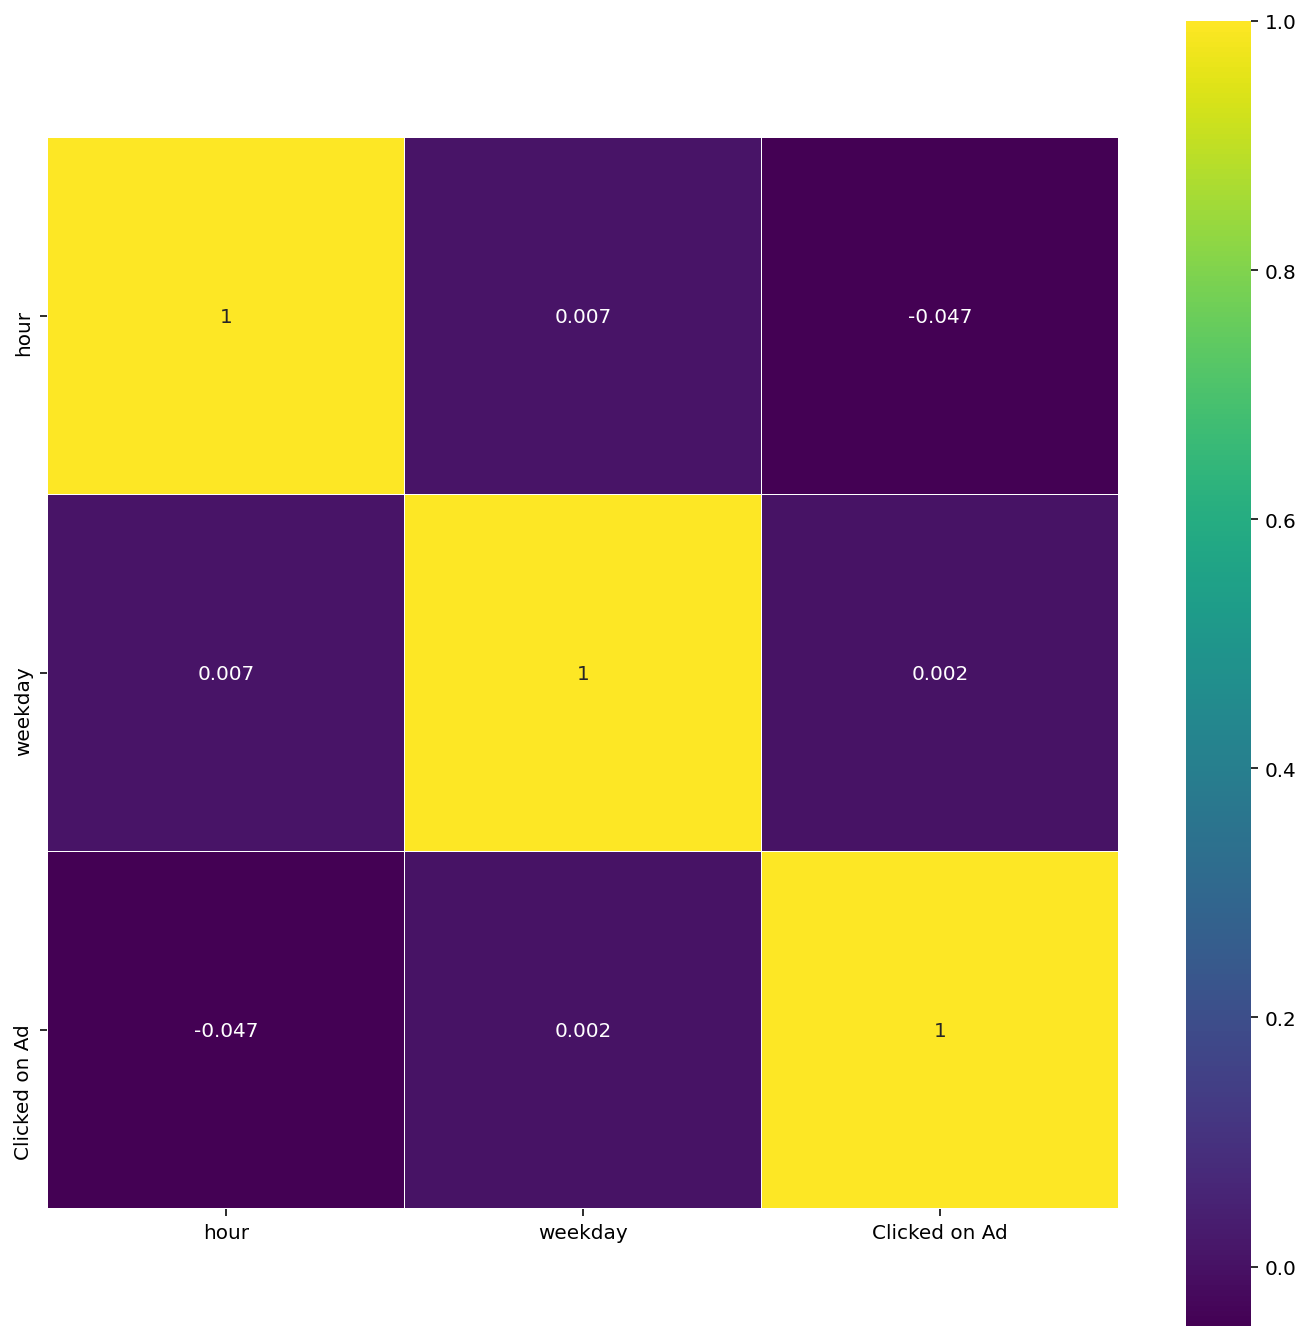

In [40]:
colormap = plt.cm.viridis
plt.figure(figsize=(12, 12))
sns.heatmap(visitors_time.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [41]:
X1 = visitors[['Male']].values
Y1 = visitors['Clicked on Ad'].values
XX1 = X1.reshape((-1,1))
YY1 = Y1.reshape((-1,1))

X1_train, X1_test, Y1_train, Y1_test = train_test_split(XX1, YY1, test_size = 0.2, random_state=42)
Y1_train = Y1_train.reshape((-1,))

model1 = logit()
model1.fit(X1_train, Y1_train)

model1.score(X1_test, Y1_test)

0.51